# <center>  Investment Analysis Portfolio Project</center>

<center> Author: Elizabeth Nduta Kinuthia </center>


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#0">Introduction</a></li>
    <li><a href="#1">Setting Up Our Environment</a></li>
    <li><a href="#3">Performing Data Wrangling</a></li>
    <li><a href="#4">Creating a Model</a></li>
    <li><a href="#5">Visualizing the Potential Cost Savings </a></li>
    <li><a href="#6">Calculating projections with NPV</a></li>
    <li><a href="#7">Calculating the IRR</a></li>
    <li><a href="#8">Conclusion</a></li>
</ul>

</div>

<hr>

<h2> <a id="0" >Introduction</a></h2>

The client, Naomi, currently uses a combination of solar power and electricity purchased from her electricity provide her to meet all her electricity needs. Solar power meets Naomi’s electricity usage at the time it is generated, and it helps Naomi reduce the amount of electricity required. However, Naomi receives no benefit from the excess energy that is generated, as she has no way of storing it. She is considering obtaining a battery to store the excess power, and she is hoping that it can also offset her current costs of electricity. The Battery costs $7000 and will be installed on January 1, 2022. It is projected to last 20 years, and can store 12.5 kWh, and has a minimum threshold of 0 kWh. 

Here are some important points to keep in mind as we progress through this analysis. 
* All electricity usage is measured in kilowatt hours (kWh)
* The current price of energy from Naomi’s electricity provider is $0.17 per kWh. 

My task as the data analyst on this project is to help Naomi determine if the cost savings generated from her investment in Solar Batteries are significant enough to justify her investment.    

### The Data
The data provided was from a measuring device Naomi had installed which provided data showing her solar electricity generation and electricity usage for 2020 in hourly increments.

### The Macroeconomic Conditions

From 1 January 2022, Naomi will pay $0.17 for each kWh of electricity purchased from her electricity provider. The electricity price increases with annual electricity price inflation on 1 January 2023, and each 1 January thereafter. 

A recent government report estimated electricity price inflation over the next 20 years to be 4% per annum Naomi thinks that the global focus on climate change will cause electricity prices to rise faster than 4% per annum and she
estimates that electricity price inflation may increase by an additional 0.25% per annum year on year (i.e. an increase of 4.0% per annum at 1 January 2023, 4.25% per annum at 1 January 2024, 4.50% per annum at 1 January 2025, etc.).


### Purpose
The goal of the analysis is to help the client determine if investing in a Solar Battery will be cost effective, and if it will help her realize any worthwhile cost savings with regards to her electricity expenditure. Our goals are threefold: 
1.	To create a model to determine the extra kWh that can be saved by using the solar battery.
2.	To analyze the potential savings in her electricity costs from purchasing the battery. 
3.	To calculate the NPV and IRR in the following 2 scenarios to help Naomi determine if this is a worthwhile investment. 
    * Scenario 1.	Electricity prices increase as expected by the government, 4% p.a.
    * Scenario 2.	Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a, as estimated by Naomi.
    
  ..

The following Jupyter Notebook contains a detailed investment analysis to help the client determine if the cost savings generated from her investment in Solar Batteries are significant enough to justify her investment.  

<h2> <a id="1" >Set Up Our Environment</a></h2>

Importing the libraries we need to perform this analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

### Importing the Data

Importing the data into a pandas dataframe and format it for further analysis. 

In [2]:
electricity_df = pd.read_excel('Junior Data Analyst _ Data.xlsx', 
                   engine = 'openpyxl',
                  sheet_name = 'Raw Data',
                  skiprows= range(2))
electricity_df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Unnamed: 4,Unnamed: 5
0,0.0,2020-01-01 00:00:00,0.0,1.509849,NaN,NaN
1,1.0,2020-01-01 01:00:00,0.0,1.411859,NaN,NaN
2,2.0,2020-01-01 02:00:00,0.0,1.023898,NaN,NaN
3,3.0,2020-01-01 03:00:00,0.0,0.642000,NaN,NaN
4,4.0,2020-01-01 04:00:00,0.0,0.960000,NaN,NaN


Removing the uneccesary columns. 

In [3]:
electricity_df.drop(['Unnamed: 4','Unnamed: 5'], axis = 1, inplace = True)
electricity_df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0.0,2020-01-01 00:00:00,0.0,1.509849
1,1.0,2020-01-01 01:00:00,0.0,1.411859
2,2.0,2020-01-01 02:00:00,0.0,1.023898
3,3.0,2020-01-01 03:00:00,0.0,0.642000
4,4.0,2020-01-01 04:00:00,0.0,0.960000


Learning more about our data with `.info()` method.

In [4]:
electricity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82734 entries, 0 to 82733
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   float64       
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.5 MB


In [5]:
electricity_df.tail()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
82729,NaN,NaT,NaN,NaN
82730,NaN,NaT,NaN,NaN
82731,NaN,NaT,NaN,NaN
82732,NaN,NaT,NaN,NaN
82733,NaN,NaT,NaN,NaN


Dropping all empty rows. 

In [6]:
electricity_df.dropna(axis = 0, inplace=True)
electricity_df.tail()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
8755,19.0,2020-12-31 19:00:00,0.012,4.395600
8756,20.0,2020-12-31 20:00:00,0.003,4.560600
8757,21.0,2020-12-31 21:00:00,0.000,2.022000
8758,22.0,2020-12-31 22:00:00,0.015,1.668000
8759,23.0,2020-12-31 23:00:00,0.000,0.805919


I'll now check the shape of the shape of the data to ensure all the data is there.

In [7]:
electricity_df.shape

(8760, 4)

Let's also change the headers to make things more convenient. 

In [8]:
electricity_df.rename(columns = {'Hour':'hour',
                                 'Date/hour start':'date_hour_start',
                                 'Solar electricity generation (kWh)':'solar_kWh',
                                 'Electricity usage (kWh)':'electric_use_kWh'}, inplace = True)
electricity_df.head()

,hour,date_hour_start,solar_kWh,electric_use_kWh
0,0.0,2020-01-01 00:00:00,0.0,1.509849
1,1.0,2020-01-01 01:00:00,0.0,1.411859
2,2.0,2020-01-01 02:00:00,0.0,1.023898
3,3.0,2020-01-01 03:00:00,0.0,0.642000
4,4.0,2020-01-01 04:00:00,0.0,0.960000


<h2> <a id="3" >Performing Data Wrangling</a></h2>

### Data Checks
My first task is to perform exploratory data analysis using data visualizations to determine what the data looks like. I had observed earlier in the Excel file that there were no null values or duplicate values. I'll check the data to see if it's complete and fit for use by doing the following: 

1. Exploratory data analysis
2. Investigating outliers
3. Making necessary corrections


#### 1) Exploratory Data Analysis

Let's first obtain some descriptive statistics to learn more about our data. 

In [9]:
electricity_df.describe()

,hour,solar_kWh,electric_use_kWh
count,8760.000000,8760.000000,8760.000000
mean,11.500000,1.116750,7.312704
std,6.922582,2.026098,491.479806
min,0.000000,0.000000,-12.624000
25%,5.750000,0.000000,0.300000
50%,11.500000,0.024000,0.621000
75%,17.250000,1.272750,1.686000
max,23.000000,13.050000,46000.000000


It's also important to visually analyze the data to get a better picture of the nature of our data. I'll start by analyzing the average solar electricity generation and average electricity usage over time (per hour). 

First, we will create a table with the kind of data that we are looking for, then graph it. 

<AxesSubplot:xlabel='hour'>

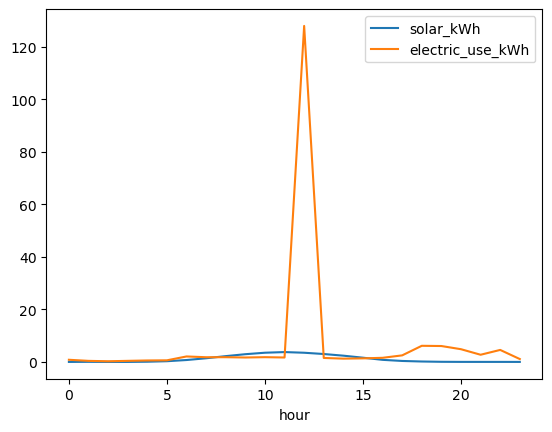

In [10]:
sol_vs_elec = electricity_df.groupby('hour').mean()

sol_vs_elec.plot(kind='line')

In [11]:
sol_vs_elec.idxmax().to_frame(), sol_vs_elec.max().to_frame()

(                     0
 solar_kWh         11.0
 electric_use_kWh  12.0,
                            0
 solar_kWh           3.751915
 electric_use_kWh  128.000444)

As we can see, there is a huge spike in electricity usage at 12noon. Let's see if there are any outliers that may be the cause of this huge spike. 

#### 2) Investigating Outliers

<AxesSubplot:xlabel='electric_use_kWh'>

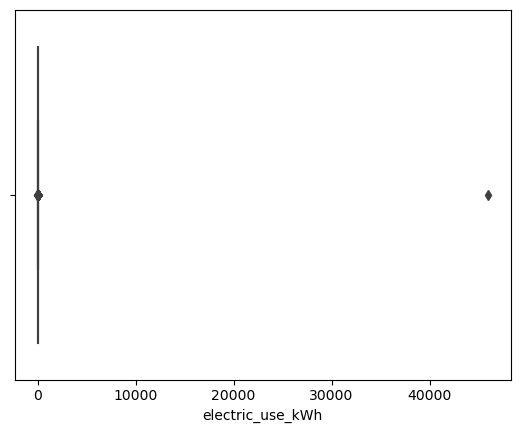

In [12]:
sns.boxplot(x='electric_use_kWh', data = electricity_df)

<AxesSubplot:xlabel='solar_kWh'>

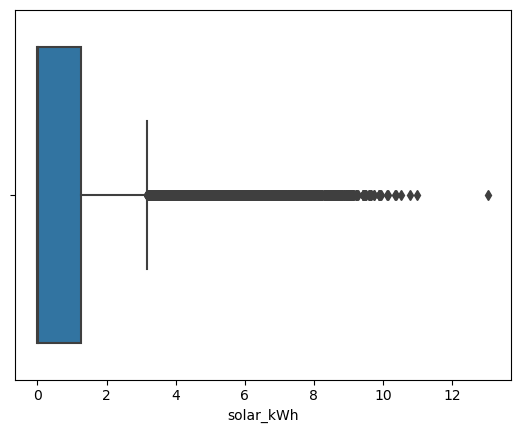

In [13]:
sns.boxplot(x='solar_kWh', data = electricity_df)

There appears to be one outlier that is skewing the mean calculation for the electricity usage. 

### Making corrections
Let's replace that value with the median, and then view our data again. 

In [14]:
#changing the name of our main dataframe for convenience
df = electricity_df

#calculate the median
elec_median = df['electric_use_kWh'].median()

#replace the extreme value
df["electric_use_kWh"] = np.where(df["electric_use_kWh"]==df["electric_use_kWh"].max(), elec_median,df['electric_use_kWh'])

Let's now graph the data and see the difference. 

<AxesSubplot:xlabel='electric_use_kWh'>

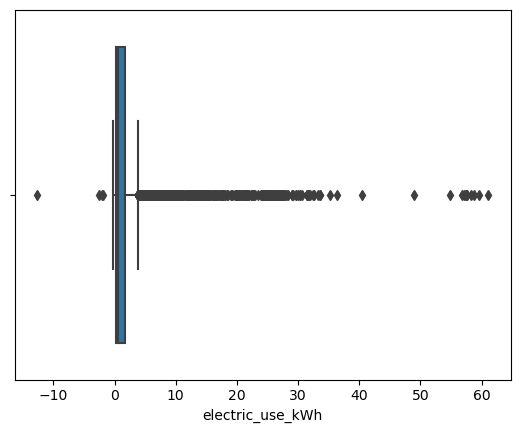

In [15]:
sns.boxplot(x='electric_use_kWh', data = electricity_df)

In [16]:
df['electric_use_kWh'].mean()

2.061633192100455

<AxesSubplot:xlabel='hour'>

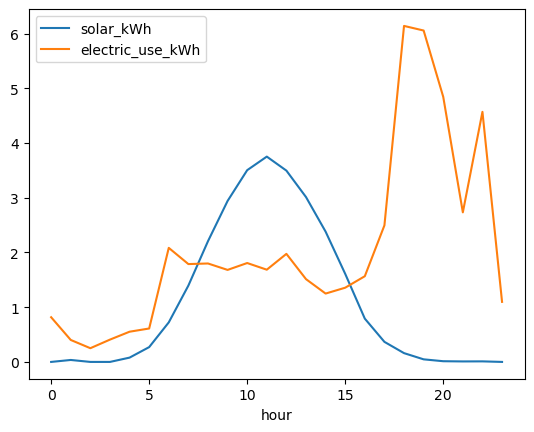

In [17]:
sol_vs_elec = df.groupby('hour').mean()

sol_vs_elec.plot(kind='line')

By removing the outlier, we have a better picture of what Naomi's electricity usage actually is. 

<h2> <a id="4" >Creating a Model</a></h2>

The next step is to create a model to determine the cumulative battery charge level (in kWh) for each hour over 2020.

We will then use this modelled data to determine the cost savings that Naomi would have obtained if she had installed the battery in 2020. 

### Amount of Electricity to be Bought

First, I need to calculate the amount of electricity to be purchased by Naomi from the electricity provider each hour in kWh. 
The values cannot be less than 0, so we will apply that constraint as well and add a new column to reflect that data called `elec_to_buy_kWh`

In [18]:
df['elec_to_buy_kWh'] = df['electric_use_kWh']-df['solar_kWh']
df.loc[df['elec_to_buy_kWh']<0,'elec_to_buy_kWh'] = 0

In [19]:
df.head(15)

,hour,date_hour_start,solar_kWh,electric_use_kWh,elec_to_buy_kWh
0,0.0,2020-01-01 00:00:00,0.000,1.509849,1.509849
1,1.0,2020-01-01 01:00:00,0.000,1.411859,1.411859
2,2.0,2020-01-01 02:00:00,0.000,1.023898,1.023898
3,3.0,2020-01-01 03:00:00,0.000,0.642000,0.642000
4,4.0,2020-01-01 04:00:00,0.000,0.960000,0.960000
5,5.0,2020-01-01 05:00:00,0.012,0.897000,0.885000
6,6.0,2020-01-01 06:00:00,0.006,0.648000,0.642000
7,7.0,2020-01-01 07:00:00,0.009,0.774000,0.765000
8,8.0,2020-01-01 08:00:00,0.012,1.299000,1.287000
9,9.0,2020-01-01 09:00:00,0.846,0.606000,0.000000


In [20]:
df['elec_to_buy_kWh'].min(), df['elec_to_buy_kWh'].max()

(0.0, 61.0968)

### Amount of Excess Solar Electricity Generated over Electricity Used (in kWh)

Next, I will calculate the amount of excess solar electricity generated over electricity used in kWh. 
The value cannot be less than zero, so we will add that contraint. This data will be added to the column `solar_excess_kWh`

In [21]:
df['solar_excess_kWh'] = df['solar_kWh']-df['electric_use_kWh']
df.loc[df['solar_excess_kWh']<0,'solar_excess_kWh'] = 0

In [22]:
df.head(15)

,hour,date_hour_start,solar_kWh,electric_use_kWh,elec_to_buy_kWh,solar_excess_kWh
0,0.0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000
1,1.0,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000
2,2.0,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000
3,3.0,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000
4,4.0,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000
5,5.0,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.000
6,6.0,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.000
7,7.0,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.000
8,8.0,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.000
9,9.0,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.240


In [23]:
df['solar_excess_kWh'].min(), df['solar_excess_kWh'].max() 

(0.0, 12.734031600000002)

### Model for Cumulative Battery Charge Level

We will now calculate the cumulative battery charge level. 

The battery charge level should:

* begin at zero at 1 January 2020 00:00.
* allow for the increase or decrease in charge level depending on the hourly results of parts (ii) and (iii).
* be subject to the cap on the maximum battery charge level.

This data will be added to the column `battery_charge_kWh`

In [24]:
battery_charge = [0]

In [25]:
for i in range(1,len(df)): 
    value = battery_charge[i-1]+df.loc[i,'solar_excess_kWh']-df.loc[i,'electric_use_kWh']
    if value <0: 
        battery_charge.append(0)
    elif value >= 12.5: 
        battery_charge.append(12.5)
    else: 
        battery_charge.append(value)

In [26]:
min(battery_charge), max(battery_charge) 

(0, 12.5)

In [27]:
df['battery_charge_kWh'] = battery_charge

In [28]:
df.head(20)

,hour,date_hour_start,solar_kWh,electric_use_kWh,elec_to_buy_kWh,solar_excess_kWh,battery_charge_kWh
0,0.0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000,0.0000
1,1.0,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000,0.0000
2,2.0,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000,0.0000
3,3.0,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000,0.0000
4,4.0,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000,0.0000
5,5.0,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.000,0.0000
6,6.0,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.000,0.0000
7,7.0,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.000,0.0000
8,8.0,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.000,0.0000
9,9.0,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.240,0.0000


### kWh of Electricity That Would Have Been Bought with Battery Installed

I'll now calculate the amount of electricity for each hour in 2020 that would have been bought from the electricity provider (measured in kWh and subject to a minimum of zero), assuming a battery had already been installed.

This is simply the electricity they Naomi has to buy, minus the battery charge. 

This data will be stored in the column named `elec_to_buy_w_battery`

In [29]:
df['elec_to_buy_w_battery'] = df['elec_to_buy_kWh']-df['battery_charge_kWh']
df.loc[df['elec_to_buy_w_battery']<0,'elec_to_buy_w_battery'] = 0

In [30]:
df.head(20)

,hour,date_hour_start,solar_kWh,electric_use_kWh,elec_to_buy_kWh,solar_excess_kWh,battery_charge_kWh,elec_to_buy_w_battery
0,0.0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000,0.0000,1.509849
1,1.0,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000,0.0000,1.411859
2,2.0,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000,0.0000,1.023898
3,3.0,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000,0.0000,0.642000
4,4.0,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000,0.0000,0.960000
5,5.0,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.000,0.0000,0.885000
6,6.0,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.000,0.0000,0.642000
7,7.0,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.000,0.0000,0.765000
8,8.0,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.000,0.0000,1.287000
9,9.0,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.240,0.0000,0.000000


### Calculate 2020 Savings while Using Battery

Calculate the saving over 2020 (in dollars ($), using 1 January 2022 electricity prices and ignoring discounting) from installing a battery compared to using the existing solar panels alone.

Cost of electricity: $0.17 per kWh

I'll put the cost savings into a column named `cost_savings` in dollars.

In [31]:
df['cost_savings'] = 0.17*df['elec_to_buy_kWh'] - 0.17*df['elec_to_buy_w_battery']

In [32]:
df[['cost_savings']].describe()

,cost_savings
count,8760.000000
mean,0.023467
std,0.094127
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.006230


<h2> <a id="5" >Visualizing the Potential Cost Savings</a></h2>

To generate the monthly charts, we need to extract the month data from the `date_hour_start` column, then we can group the data accordingly. 

In [33]:
df['month'] = df['date_hour_start'].dt.strftime('%B')

In [34]:
df.head()

,hour,date_hour_start,solar_kWh,electric_use_kWh,elec_to_buy_kWh,solar_excess_kWh,battery_charge_kWh,elec_to_buy_w_battery,cost_savings,month
0,0.0,2020-01-01 00:00:00,0.0,1.509849,1.509849,0.0,0.0,1.509849,0.0,January
1,1.0,2020-01-01 01:00:00,0.0,1.411859,1.411859,0.0,0.0,1.411859,0.0,January
2,2.0,2020-01-01 02:00:00,0.0,1.023898,1.023898,0.0,0.0,1.023898,0.0,January
3,3.0,2020-01-01 03:00:00,0.0,0.642000,0.642000,0.0,0.0,0.642000,0.0,January
4,4.0,2020-01-01 04:00:00,0.0,0.960000,0.960000,0.0,0.0,0.960000,0.0,January


### Preparing the Charts

We need to group the data and sort it in order for the data to be ready for visualization. 

In [35]:
#grouping the data
df_monthly = df.groupby('month').sum()
df_monthly

,hour,solar_kWh,electric_use_kWh,elec_to_buy_kWh,solar_excess_kWh,battery_charge_kWh,elec_to_buy_w_battery,cost_savings
month,,,,,,,,
April,8280.0,915.132,1726.356487,1460.504519,649.280032,1808.722680,1366.067677,16.054263
August,8556.0,1158.639,1491.525351,1217.886351,885.000000,2928.178924,1061.982898,26.503587
December,8556.0,205.965,1960.563395,1852.518395,97.920000,370.554000,1821.258395,5.314200
February,7728.0,449.634,1557.578810,1392.808310,284.863500,954.458573,1337.212110,9.451354
January,8556.0,266.259,1705.801181,1599.601181,160.059000,507.521600,1568.893181,5.220360
July,8556.0,1371.465,1196.957121,907.445121,1081.953000,3295.602656,757.601675,25.473386
June,8280.0,1408.287,1158.995538,844.784538,1094.076000,3348.979991,689.306770,26.431221
March,8556.0,602.451,1797.859450,1619.011450,423.603000,1348.463600,1544.131850,12.729532
May,8556.0,1641.360,943.803809,717.333809,1414.890000,4205.310081,532.806345,31.369669


We now need to sort and order the monthly data so that it makes sense when we graph it later. 

In [36]:
new_order = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df_monthly2 = df_monthly.reindex(new_order, axis=0)
df_monthly2

,hour,solar_kWh,electric_use_kWh,elec_to_buy_kWh,solar_excess_kWh,battery_charge_kWh,elec_to_buy_w_battery,cost_savings
month,,,,,,,,
January,8556.0,266.259,1705.801181,1599.601181,160.059000,507.521600,1568.893181,5.220360
February,7728.0,449.634,1557.578810,1392.808310,284.863500,954.458573,1337.212110,9.451354
March,8556.0,602.451,1797.859450,1619.011450,423.603000,1348.463600,1544.131850,12.729532
April,8280.0,915.132,1726.356487,1460.504519,649.280032,1808.722680,1366.067677,16.054263
May,8556.0,1641.360,943.803809,717.333809,1414.890000,4205.310081,532.806345,31.369669
June,8280.0,1408.287,1158.995538,844.784538,1094.076000,3348.979991,689.306770,26.431221
July,8556.0,1371.465,1196.957121,907.445121,1081.953000,3295.602656,757.601675,25.473386
August,8556.0,1158.639,1491.525351,1217.886351,885.000000,2928.178924,1061.982898,26.503587
September,8280.0,835.680,1620.714165,1398.834165,613.800000,1976.154437,1288.260760,18.797479


Now we can graph all of our monthly data. 

### Total Monthly Solar Generation vs Electricity Usage

The first chart that I need to create is a column chart depicting monthly solar generation compared to electricity usage. This will help me to determine the months that the solar power was being wasted as it was not able to be stored, and it would also help me determine Naomi’s electricity usage.

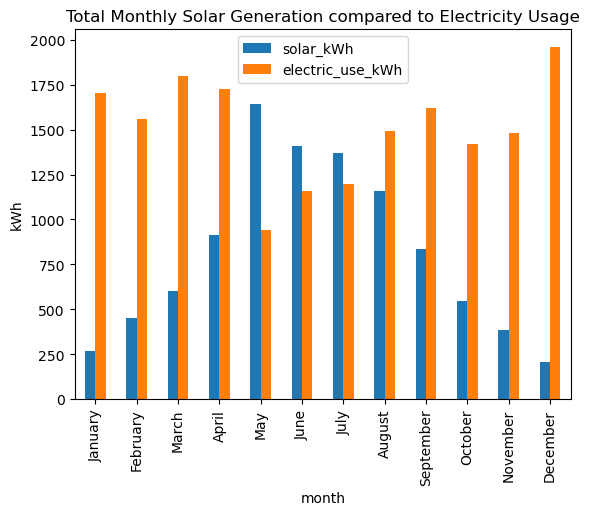

In [37]:
df_monthly2[['solar_kWh','electric_use_kWh']].plot(kind='bar')

plt.title("Total Monthly Solar Generation compared to Electricity Usage")
plt.ylabel('kWh')

plt.show()

Even though the summer months generate the most solar power for Naomi, she uses the most electricity during the winter months. This probably means that the uses tools such as heaters to keep warm during the winter months, but she is not able to take advantage of all of the energy generated during the summer months. This is probably a fact that incentivized her to consider getting a battery, to ensure that she is able to make the most of the power that is generated from her solar panels.

### Monthly electricity purchased from the electricity provider (no battery vs with battery) 

The second chart that I need to create is a line chart to visualize the potential savings in electricity purchased if Naomi had invested in a battery in 2020. 

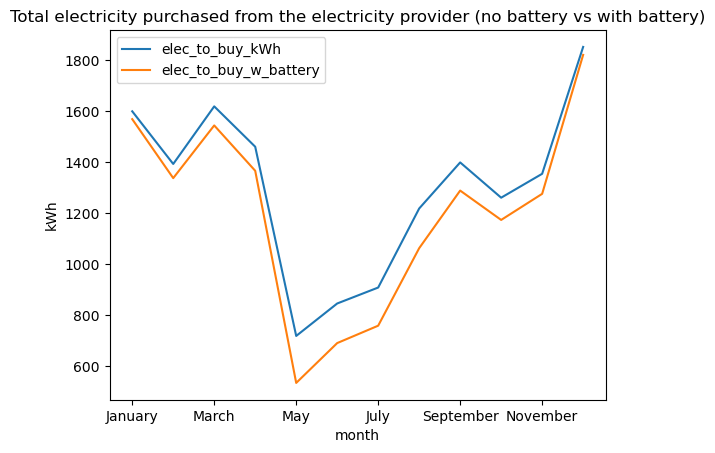

In [38]:
df_monthly2[['elec_to_buy_kWh','elec_to_buy_w_battery']].plot(kind='line')

plt.title("Total electricity purchased from the electricity provider (no battery vs with battery)")
plt.ylabel('kWh')

plt.show()

Naomi would have to buy much less power from her electricity provider if she had purchased the battery. But the question is, are those potential savings significant enough to justify her investment? In order to answer this question, we need to calculate the NPV and the IRR to determine if this investment would be worthwhile. 

<h2> <a id="6" >Calculating Projections with NPV</a></h2>

The Net Present Value (NPV) is the difference between the present value of cash inflows and the present value of cash outflows over a period of time. 

The formula for NPV is as follows: 

`NPV = Today’s value of the expected cash flows − Today’s value of invested cash`

You know that it’s a profitable investment when your NPV is positive, and if your NPV is negative, then your investment may not be worthwhile and will not give you a positive return.

We are going to calculate the NPV for 2 scenarios: 
1. Electricity prices increase as expected by the government, 4% p.a.
2. Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a., as estimated by Naomi.

**Assumption:** in order to calculate the NPV and IRR with the data provided, we need to assume that Naomi will have the same energy usage every single year for the next 20 years.

### Projecting Annual Savings

We first need to project into the future what the annual savings will be. 

We will use the monthly table that we created above below to calculate the total annual savings for 2022 (the values are in dollars)

In [39]:
#find the cashflow of savings for 2022
savings2022 = df['cost_savings'].sum()

#create a list with just the initial investment of the battery
savings = [-7000]

### Scenario 1. Electricity prices increase as expected by the government, 4% p.a.

In [40]:
#set the electricity price increate rate
elec_growthrate = 0.04

#calculate the cost savings cash flow per year, and put it into list
for i in range(0,20): 
    value = savings2022*(1+elec_growthrate)**i
    savings.append(value)
    
savings

[-7000,
 205.57494058800003,
 213.79793821152003,
 222.34985573998085,
 231.24384996958008,
 240.49360396836332,
 250.11334812709782,
 260.1178820521818,
 270.52259733426905,
 281.3435012276398,
 292.5972412767454,
 304.3011309278152,
 316.47317616492785,
 329.132103211525,
 342.297387339986,
 355.98928283358543,
 370.2288541469289,
 385.038008312806,
 400.4395286453183,
 416.4571097911311,
 433.1153941827763]

Now we can find the NPV.

In [41]:
#set the discount rate
disc_rate = 0.06
npv_values1 = []

#calculate the NPV
for i,c in enumerate(savings):
    disc_value = c/(1+disc_rate)**i
    npv_values1.append(disc_value)

NPV1 = sum(npv_values1)
NPV1

-3743.7191846526052

As we can see, the NPV is negative, meaning that purchasing the battery at this rate be a worthwhile investment to help Naomi lower her electricity costs in the next 20 years. 

### Scenario 2: Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a., as estimated by Naomi.

In [42]:
#set the electricity price increate rate
elec_growthrate = 0.04
gr_increase = 0.0025

#reset the list
savings2 = [-7000]

#calculate the cost savings cash flow per year, and put it into list
for i in range(0,20): 
    if i == 0: 
        value = savings2022*(1+elec_growthrate)**i
        savings2.append(value)
    else:
        value = savings2022*(1+(elec_growthrate+((i)*gr_increase)))**i
        savings2.append(value)
    
savings2

[-7000,
 205.57494058800003,
 214.31187556299002,
 224.4929744956107,
 236.28288685273097,
 249.87762512809277,
 265.5098858224355,
 283.4555280802668,
 304.04145748707606,
 327.65522322797614,
 354.75671270000544,
 385.89242289825745,
 421.71290777140104,
 462.994152093415,
 510.66381402983046,
 565.8335218706882,
 629.8387201117366,
 704.2879553613104,
 791.123998407958,
 892.6998478225146,
 1011.8734953979823]

Now we can find the NPV.

In [43]:
#set the discount rate
disc_rate = 0.06
npv_values2 = []

#calculate the NPV
for i,c in enumerate(savings2):
    disc_value = c/(1+disc_rate)**i
    npv_values2.append(disc_value)

NPV2 = sum(npv_values2)
NPV2

-2605.370782529751

As we can see, the NPV is negative, meaning that purchasing the battery at this rate be a worthwhile investment to help Naomi lower her electricity costs in the next 20 years. 

<h2> <a id="7" >Calculating the IRR</a></h2>

The Internal Rate of Return (IRR) is the value of the return rate that makes NPV = 0. 

In order for your investment to be considered good, it needs to have a high rate of return (above 20%). If your Internal Rate of Return is low (less than 5%), then it would be wise to reconsider your investment option. 

First, we need to download the package that contains the IRR method. 

In [44]:
!pip install numpy-financial
import numpy_financial as npf

### Scenario 1: Price increase of 4%

In [45]:
npf.irr(npv_values1)

-0.0671119542630888

### Scenario 1: Price increase of 4% + 0.25% annual increase

In [46]:
npf.irr(npv_values2)

-0.03785967969002835

In both cases, the IRR is negative, meaning that investing in the solar battery would not be a profitable investment for Naomi with these projected economic conditions. 

<h2> <a id="8" >Conclusion</a></h2>

In conclusion, based on the results of my analysis, I would not recommend that Naomi purchase solar batteries purely on an investment basis. While she may receive increased energy storage capacity from purchasing the battery, investing in the batteries will not provide her with cost savings that are significant enough to justify her investment. 

## Thank you !

Thank you for taking the time to look at my case study. 